DSA210 Fall 2025 Project - Ömer Berke Uzun 34335

# Import Modules and Read the dataset

Import the necessart modules and load the previously cleaned and merged dataset (check merger.py)

In [56]:
#Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [57]:
#Load the cleaned and merged dataset
merged_df = pd.read_csv("./Processed Data/merged_data.csv")

# Exploratory Data Analysis

In [58]:
print(f"Shape: {merged_df.shape}\n")
print(f"Dtypes:\n{merged_df.dtypes}")

Shape: (123, 16)

Dtypes:
Country                                     object
Density (P/Km2)                            float64
Birth Rate                                 float64
CPI                                        float64
CPI Change (%)                             float64
GDP                                        float64
Gross primary education enrollment (%)     float64
Gross tertiary education enrollment (%)    float64
Life expectancy                            float64
Total tax rate                             float64
Unemployment rate                          float64
Urban_population                           float64
Alcohol Total Per Capita Consumption       float64
Tobacco Use Estimate                       float64
Tobacco Regulation                          object
Alcohol Regulation                          object
dtype: object


In [59]:
print(merged_df.head())
print(merged_df.describe())

       Country  Density (P/Km2)  Birth Rate     CPI  CPI Change (%)  \
0  Afghanistan             60.0       32.49  149.90             2.3   
1      Albania            105.0       11.78  119.05             1.4   
2      Algeria             18.0       24.28  151.36             2.0   
3    Argentina             17.0       17.02  232.75            53.5   
4      Armenia            104.0       13.99  129.18             1.4   

            GDP  Gross primary education enrollment (%)  \
0  1.910135e+10                                   104.0   
1  1.527808e+10                                   107.0   
2  1.699882e+11                                   109.9   
3  4.496634e+11                                   109.7   
4  1.367280e+10                                    92.7   

   Gross tertiary education enrollment (%)  Life expectancy  Total tax rate  \
0                                      9.7             64.5            71.4   
1                                     55.0             78.5 

Distributions of some features

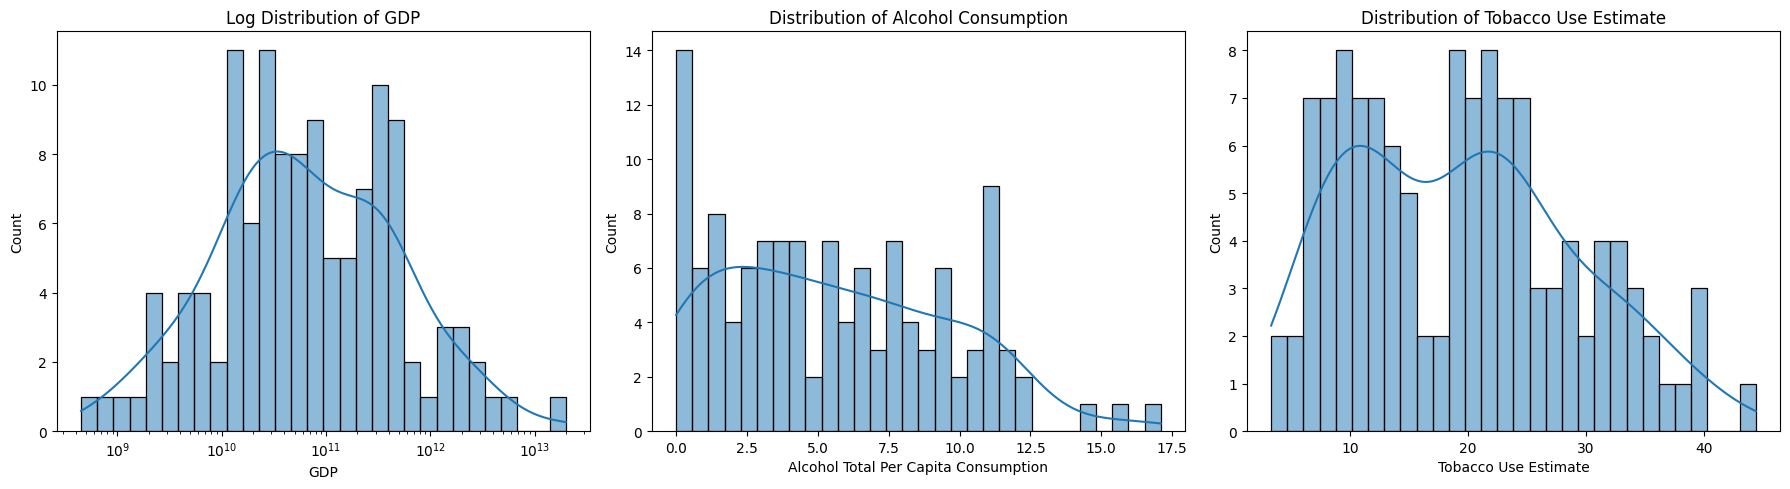

In [77]:
#Distributions of GDP, Alcohol Consumption, and Tobacco Use
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(merged_df["GDP"], bins=30, ax=axes[0], kde=True, log_scale=True)
axes[0].set_title("Log Distribution of GDP")
sns.histplot(merged_df["Alcohol Total Per Capita Consumption"], bins=30, ax=axes[1], kde=True)
axes[1].set_title("Distribution of Alcohol Consumption")
sns.histplot(merged_df["Tobacco Use Estimate"], bins=30, ax=axes[2], kde=True)
axes[2].set_title("Distribution of Tobacco Use Estimate")
plt.tight_layout()
plt.show()


Bar plot of how many countries enforce regulations

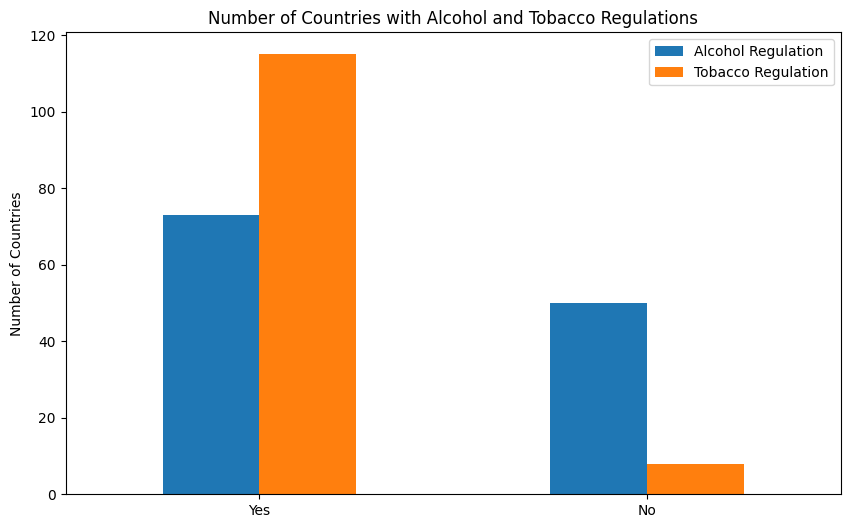

In [79]:
#Bar chart showing number of countries with alcohol and tobacco regulations
reg_counts = merged_df[["Alcohol Regulation", "Tobacco Regulation"]].apply(pd.Series.value_counts)
reg_counts.plot(kind="bar", figsize=(10, 6))
plt.title("Number of Countries with Alcohol and Tobacco Regulations")
plt.ylabel("Number of Countries")
plt.xticks(rotation=0)
plt.show()

Plotting regulations effect on consumption

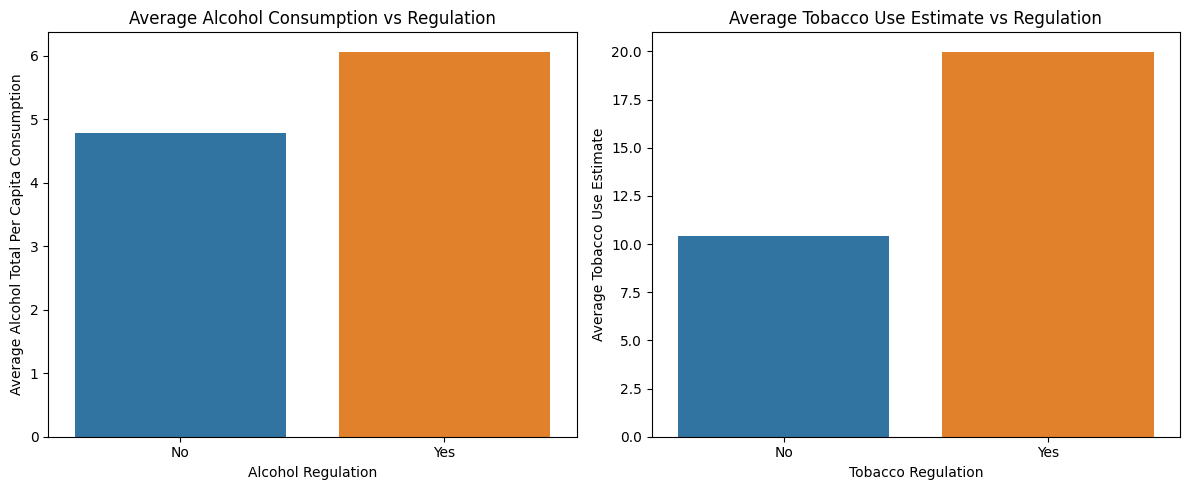

In [ ]:
#Calculate means for Alcohol and Tobacco usage based on regulation
avg_alcohol_vs_reg = merged_df.groupby("Alcohol Regulation")["Alcohol Total Per Capita Consumption"].mean().sort_values()
avg_tobacco_vs_reg = merged_df.groupby("Tobacco Regulation")["Tobacco Use Estimate"].mean().sort_values()

#Plot the results
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.barplot(x=avg_alcohol_vs_reg.index, y=avg_alcohol_vs_reg.values, hue=avg_alcohol_vs_reg.index,legend=False)
plt.title("Average Alcohol Consumption vs Regulation")
plt.xlabel("Alcohol Regulation")
plt.ylabel("Average Alcohol Total Per Capita Consumption")

plt.subplot(1, 2, 2)
sns.barplot(x=avg_tobacco_vs_reg.index, y=avg_tobacco_vs_reg.values, hue=avg_tobacco_vs_reg.index,legend=False)
plt.title("Average Tobacco Use Estimate vs Regulation")
plt.xlabel("Tobacco Regulation")
plt.ylabel("Average Tobacco Use Estimate")
plt.tight_layout()
plt.show()

Scatterplots for relationship between alcohol and tobacco usage and various features

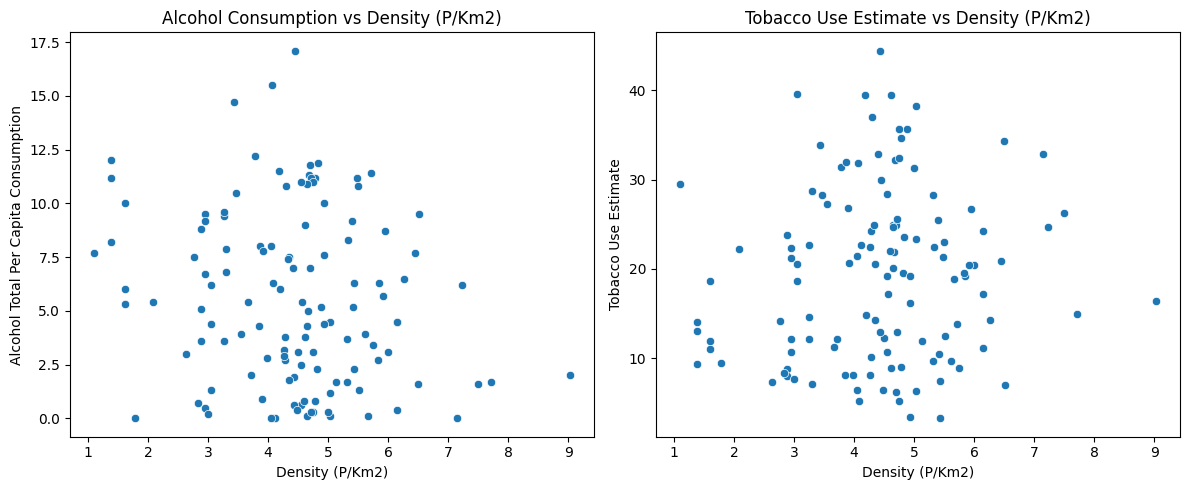

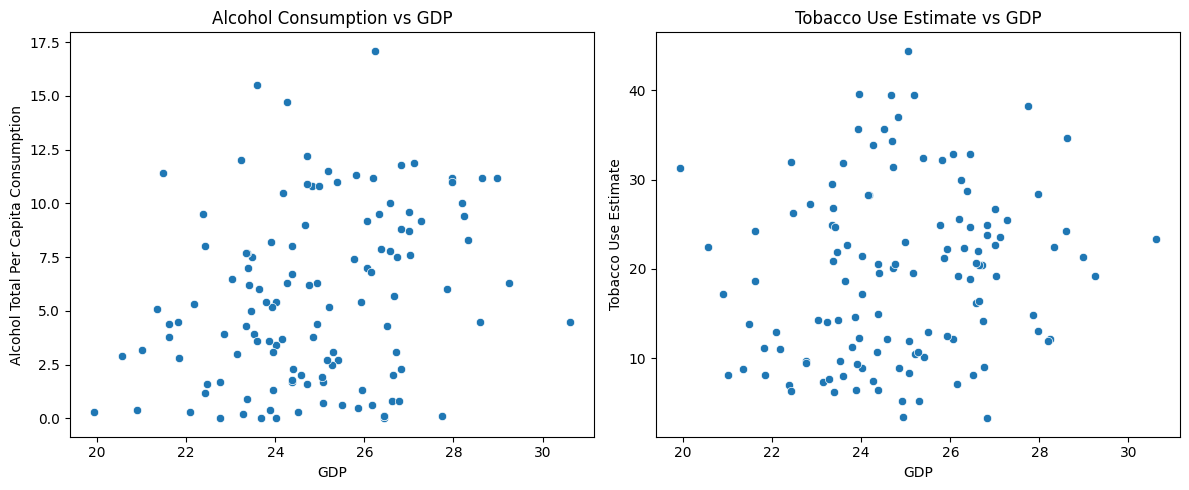

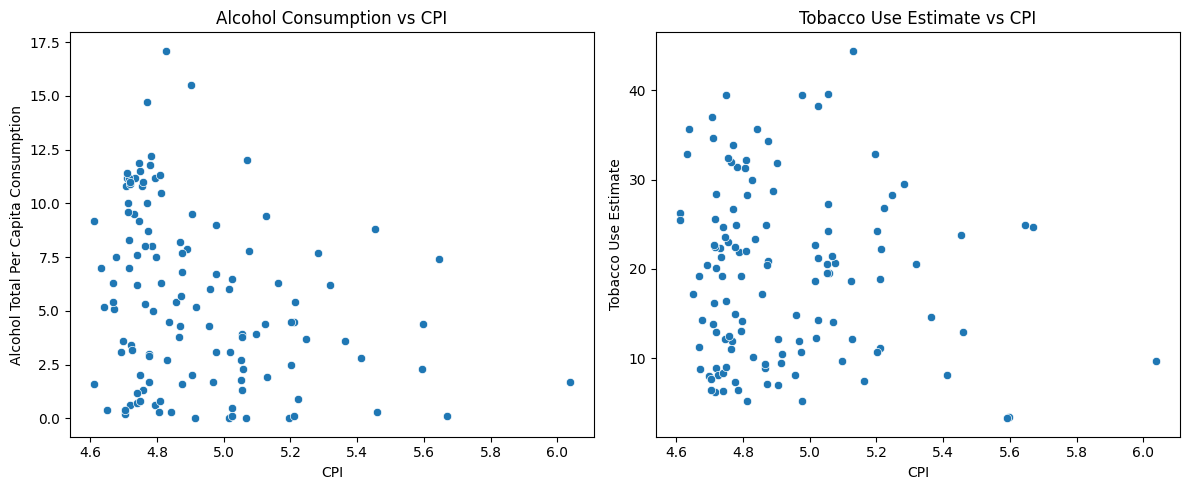

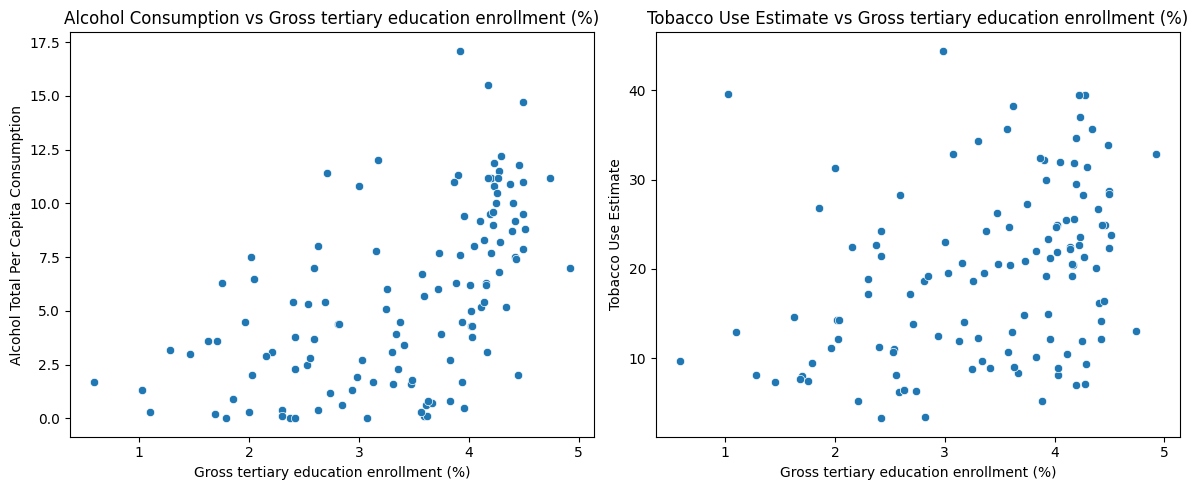

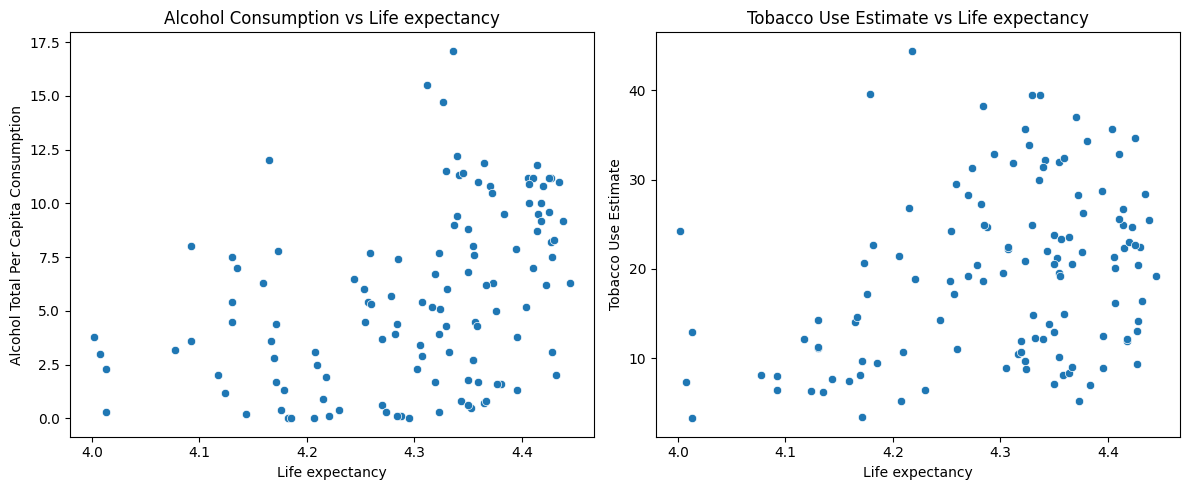

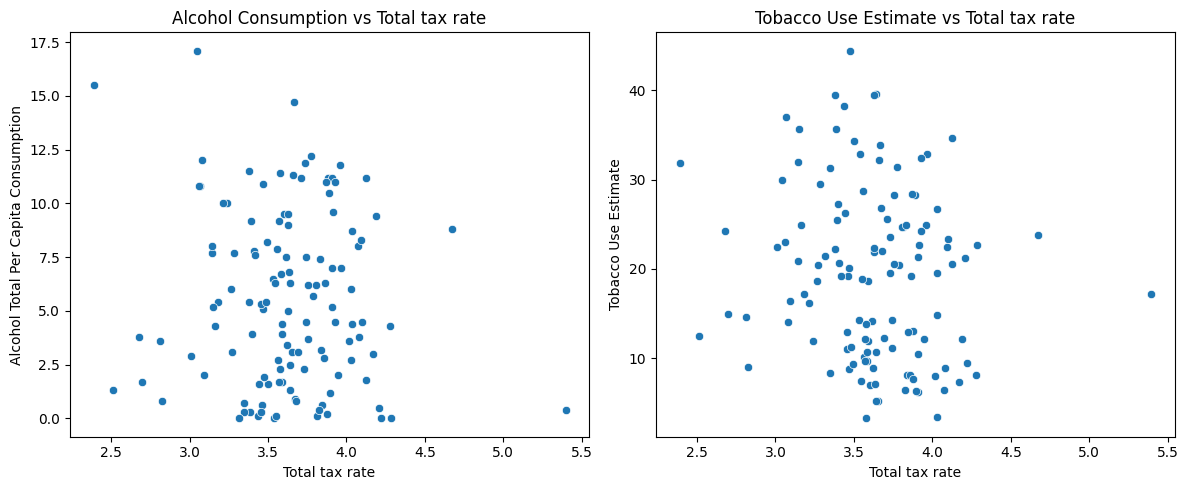

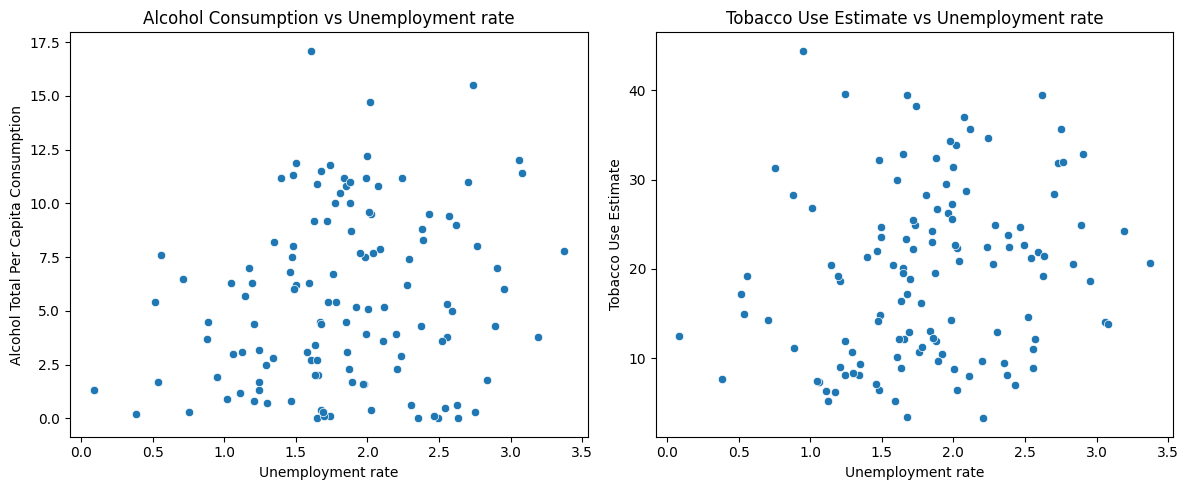

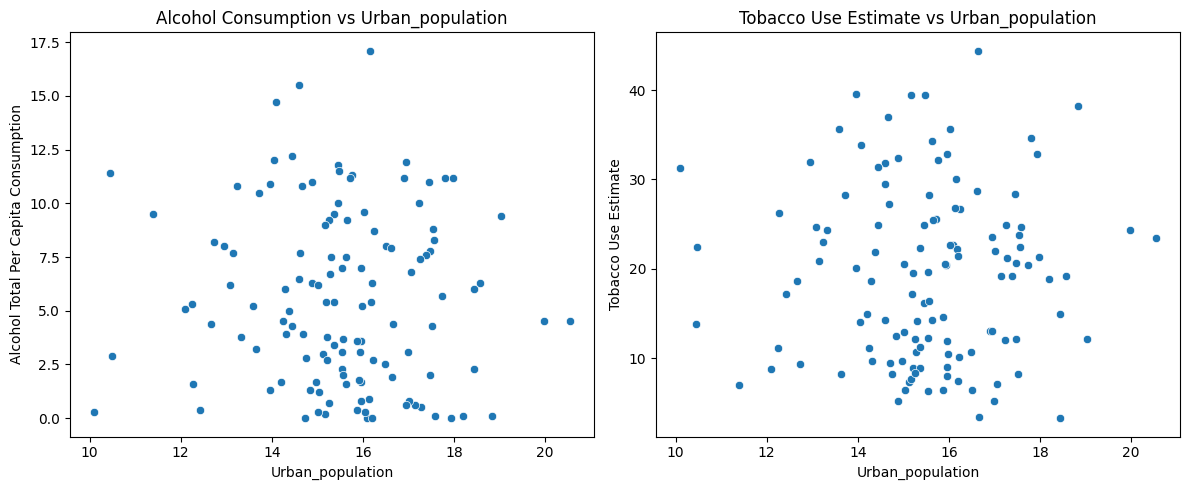

In [63]:
#Scaterplots for relationship between alcohol and tobacco usage and log of various features
features = ["Density (P/Km2)", "GDP", "CPI", "Gross tertiary education enrollment (%)", "Life expectancy", "Total tax rate", "Unemployment rate", "Urban_population"]

for feature in features:
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    sns.scatterplot(data=merged_df, x=np.log1p(merged_df[feature]), y="Alcohol Total Per Capita Consumption")
    plt.title(f"Alcohol Consumption vs {feature}")
    
    plt.subplot(1, 2, 2)
    sns.scatterplot(data=merged_df, x=np.log1p(merged_df[feature]), y="Tobacco Use Estimate")
    plt.title(f"Tobacco Use Estimate vs {feature}")
    
    plt.tight_layout()
    plt.show()

Boxplot and Violinplots of various features

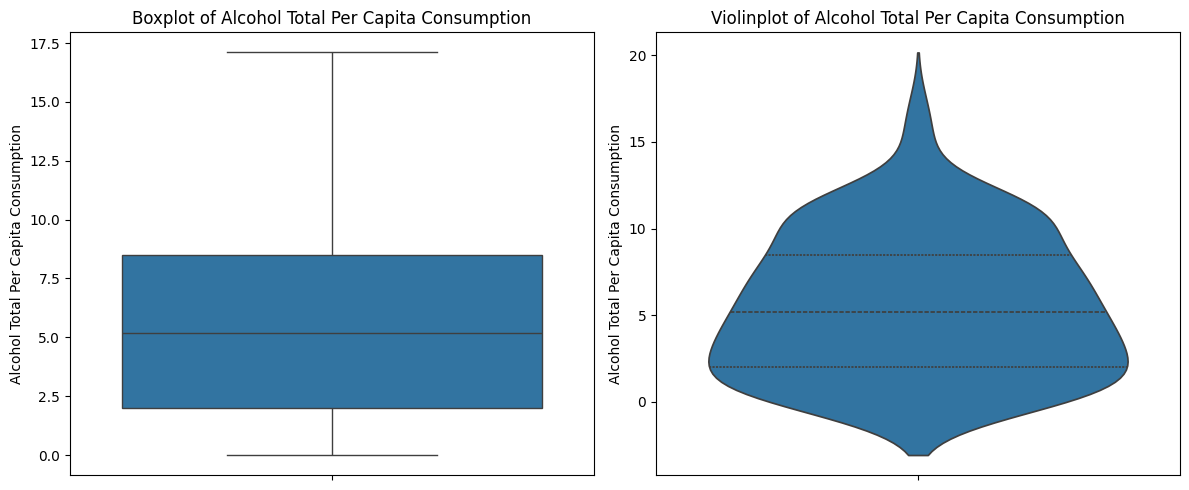

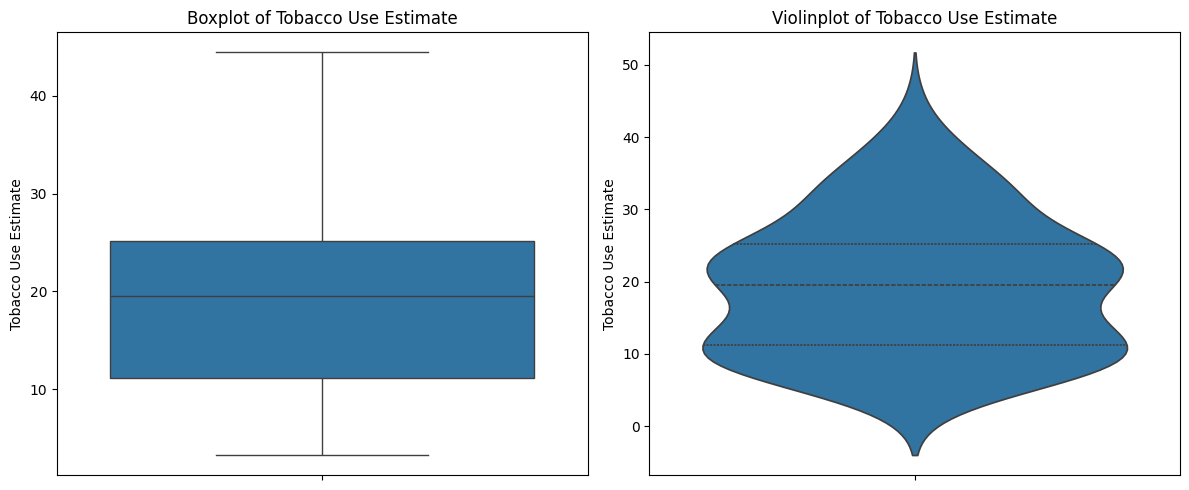

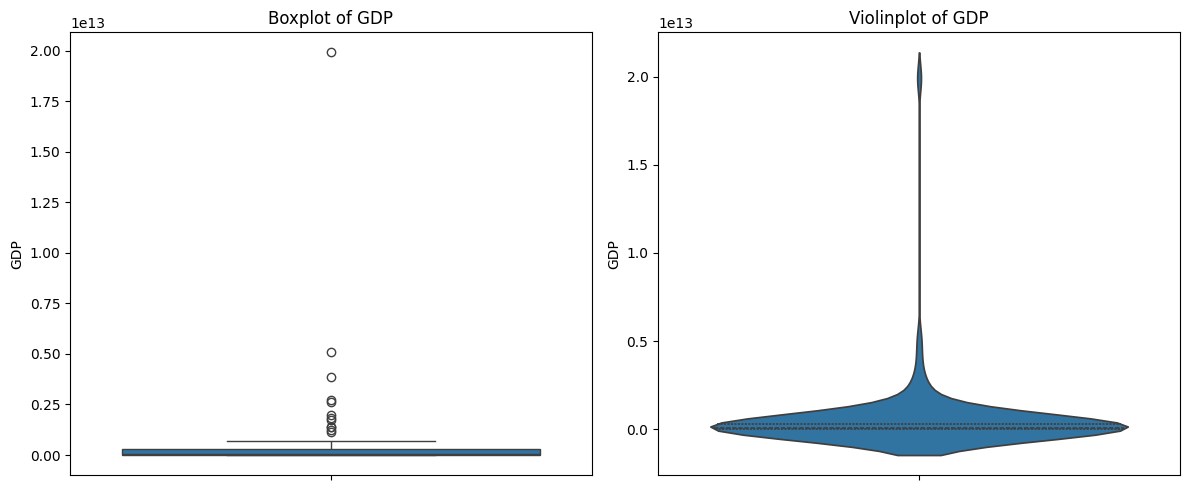

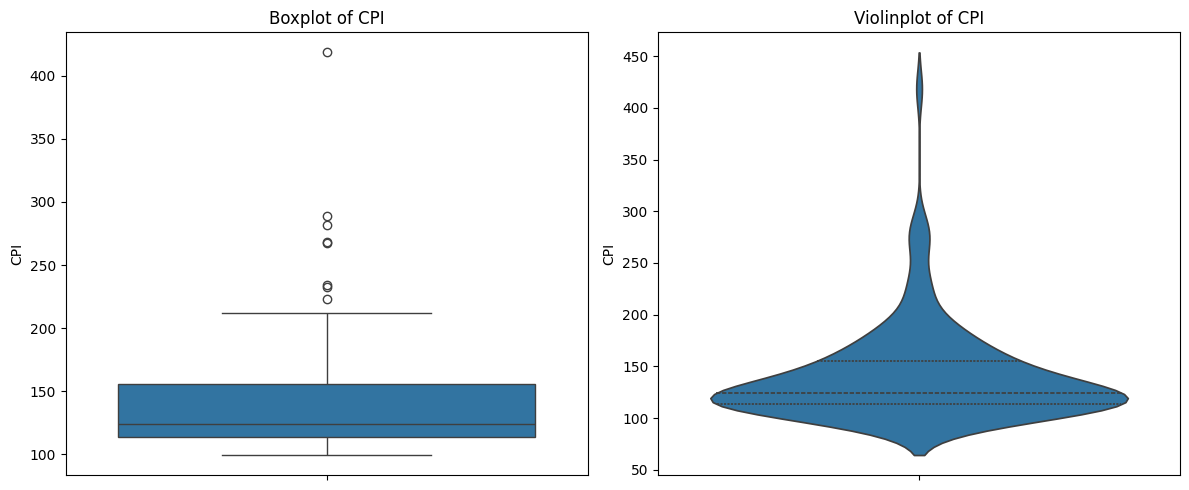

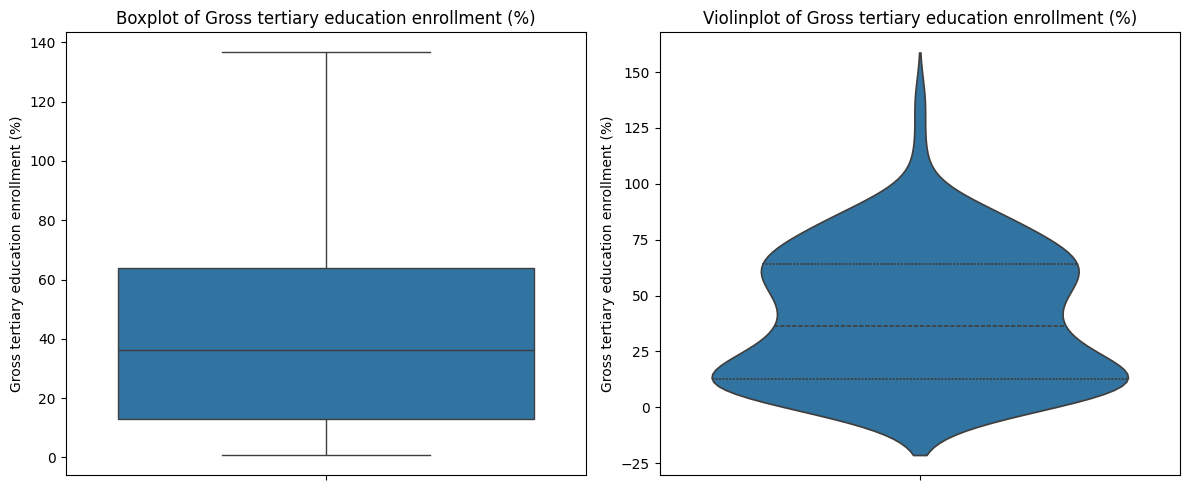

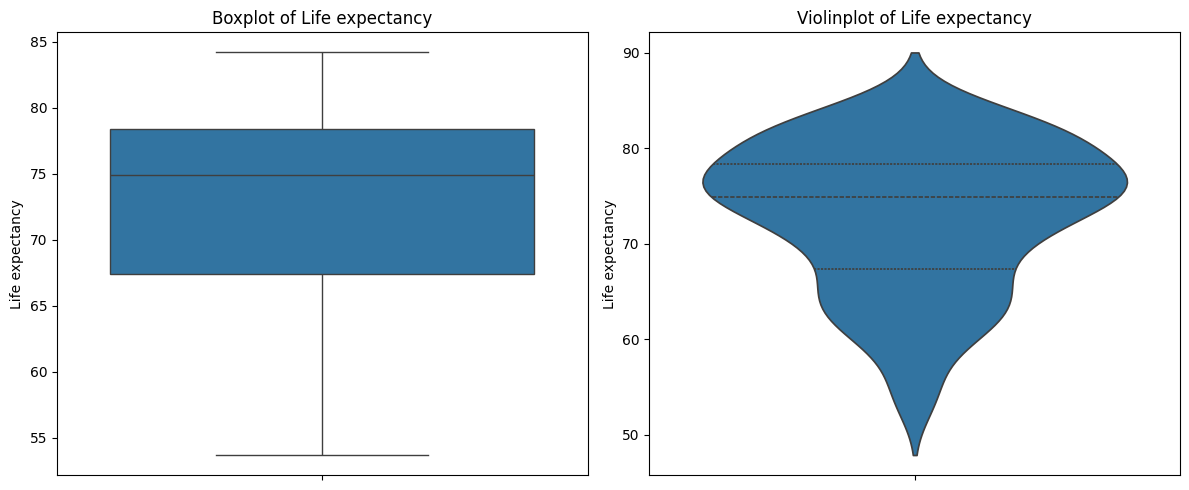

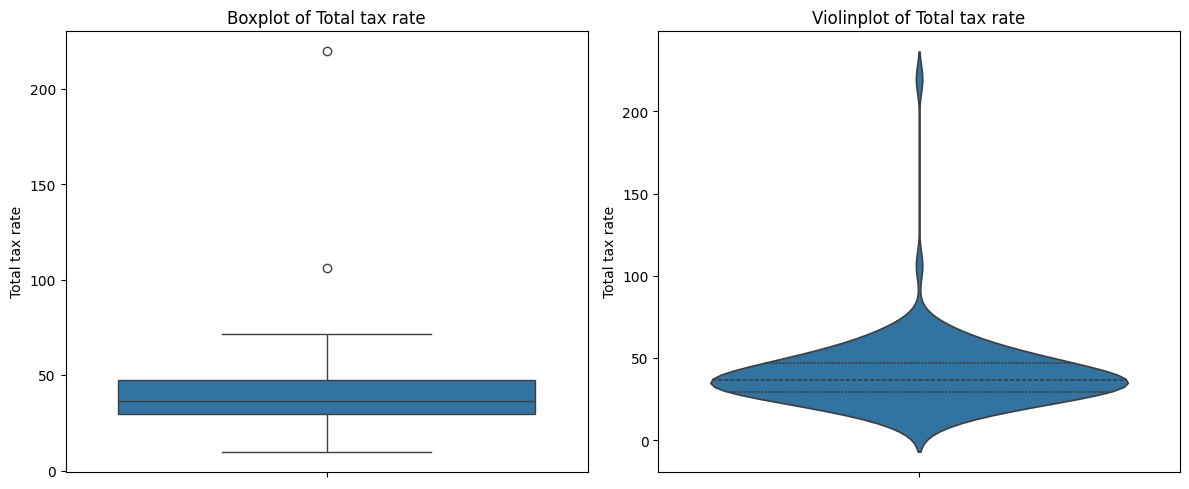

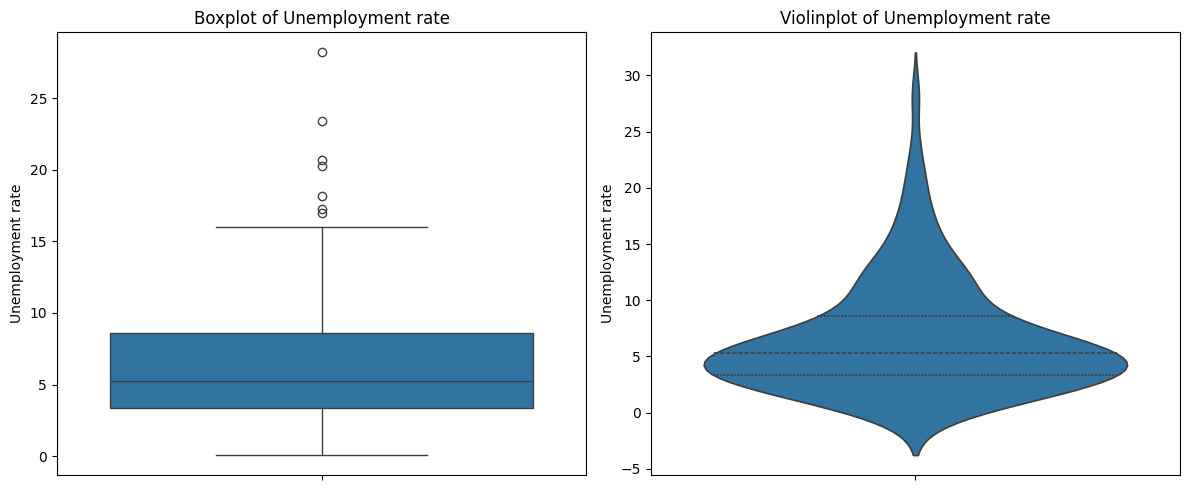

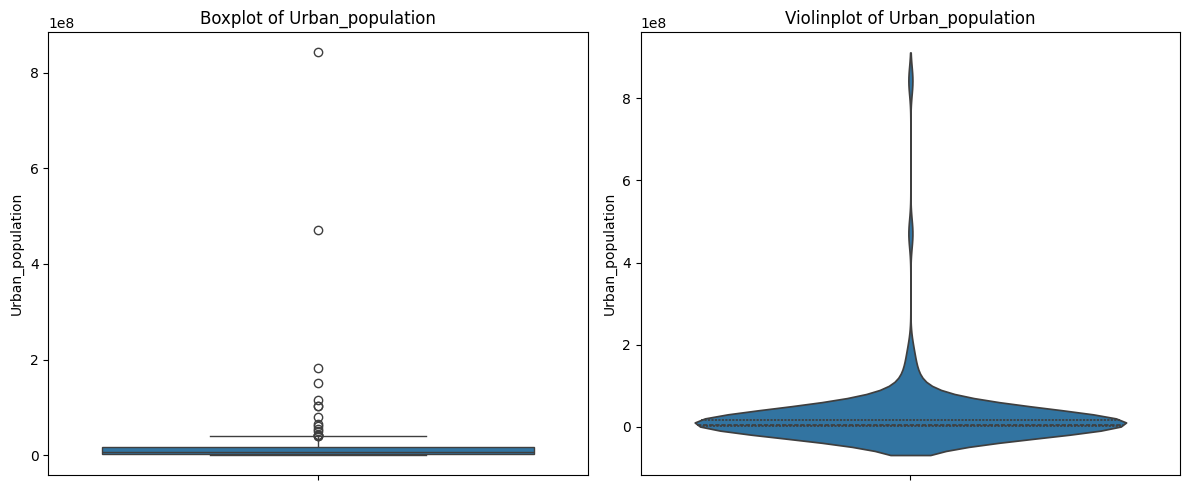

In [80]:
#Boxplot and Violinplots of various features
features = ["Alcohol Total Per Capita Consumption", "Tobacco Use Estimate", "GDP", "CPI", "Gross tertiary education enrollment (%)", "Life expectancy", "Total tax rate", "Unemployment rate", "Urban_population"]

for feature in features:
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    sns.boxplot(y=merged_df[feature])
    plt.title(f"Boxplot of {feature}")
    
    plt.subplot(1, 2, 2)
    sns.violinplot(y=merged_df[feature], inner="quartile")
    plt.title(f"Violinplot of {feature}")
    
    plt.tight_layout()
    plt.show()

Correlation matrices

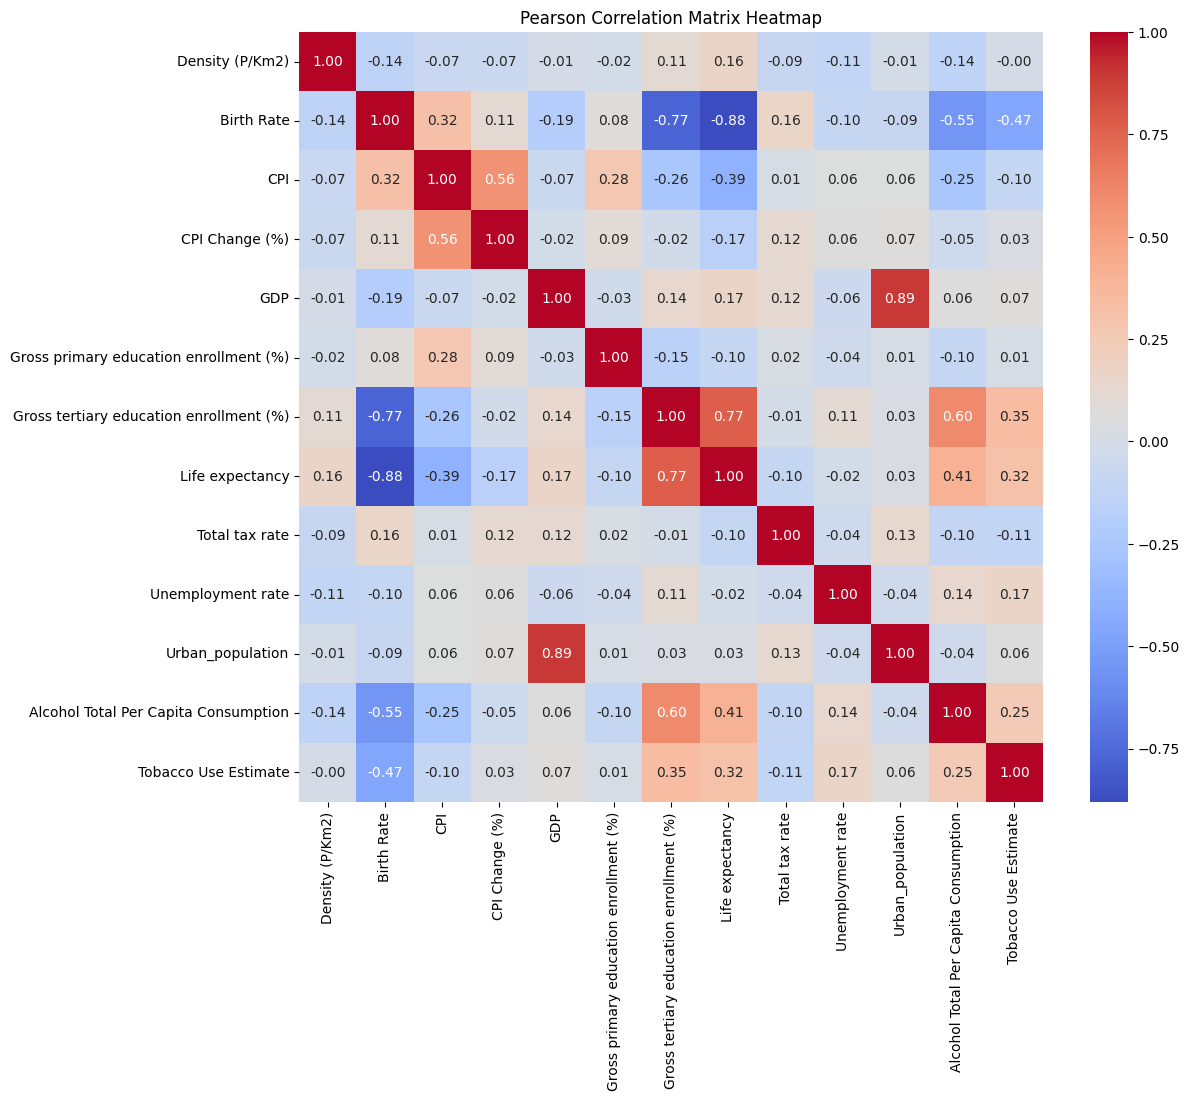

In [81]:
#Pearson correlation matrix heatmap of all numerical features
corr = merged_df.corr(numeric_only=True)
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Pearson Correlation Matrix Heatmap")
plt.show()

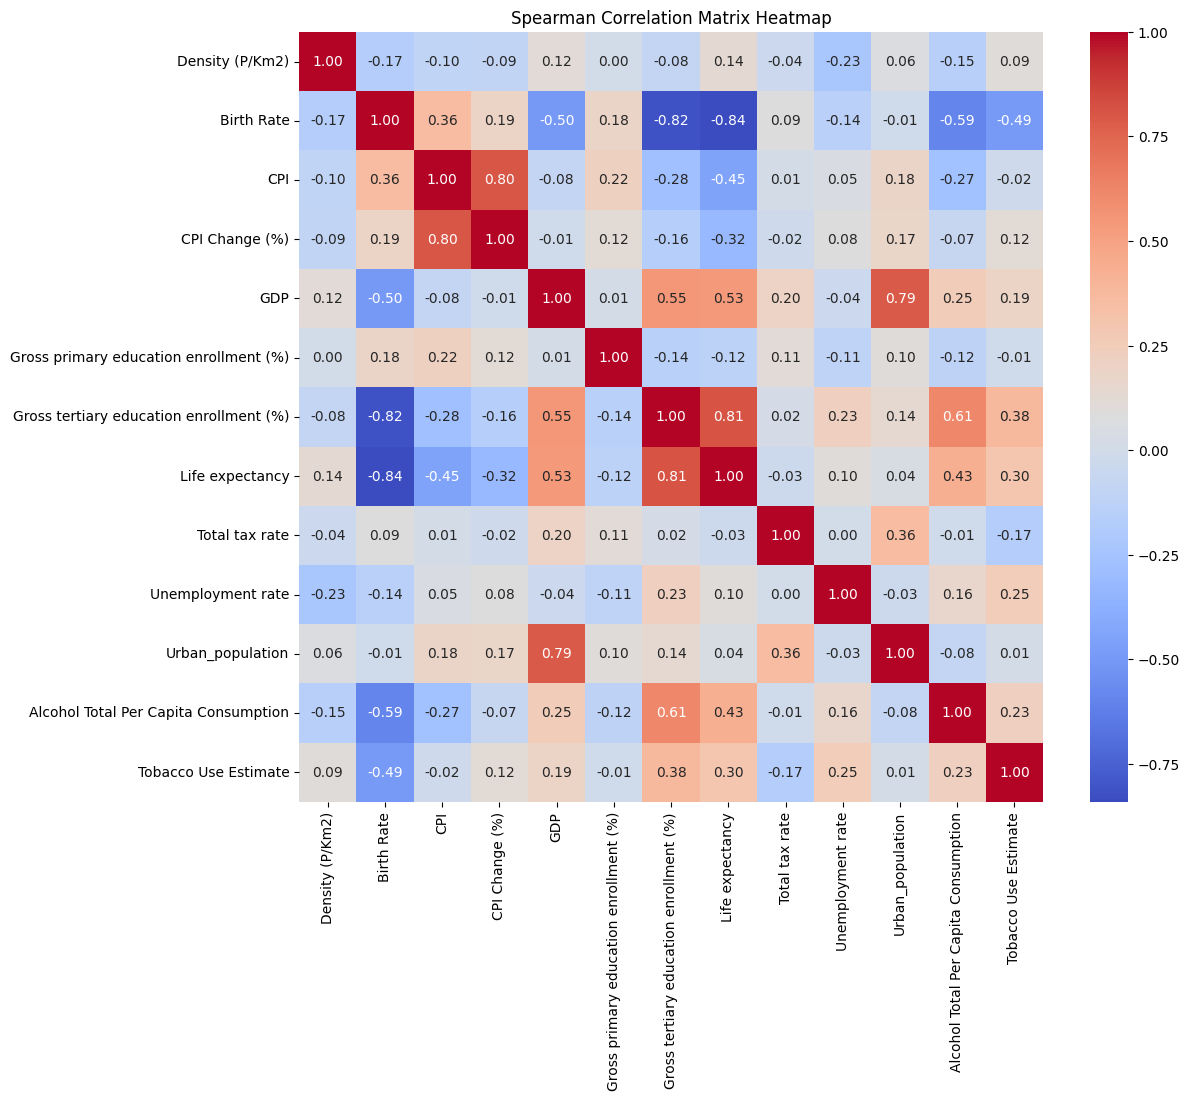

In [82]:
#Spearman correlation matrix heatmap of all numerical features
spearman_corr = merged_df.corr(method="spearman", numeric_only=True)
plt.figure(figsize=(12, 10))
sns.heatmap(spearman_corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Spearman Correlation Matrix Heatmap")
plt.show()

# Hypothesis Tests

**Hypothesis Test 1: Gross Tertiary education enrollment and Alcohol Total Per Capita Consumption**   
 -H0: Gross Tertiary education enrollment and Alcohol Total Per Capita Consumption are not correlated.   
 -H1: Gross Tertiary education enrollment and Alcohol Total Per Capita Consumption are correlated

In [ ]:
from scipy.stats import spearmanr

#Function to calculate spearman correlation coefficient for two variables and inform user of results
def spearman_correlation_analysis(x_var, y_var):
    spearman_r, spearman_p = spearmanr(x_var, y_var)

    #Print correlation results
    print(f"Spearman correlation between Gross tertiary education enrollment (%) and Tobacco Use Estimate: r = {spearman_r:.4f}, p-value = {spearman_p:.44f}")

    #There is correlation
    if spearman_p < 0.05:
        #Calculate correlation strength
        absspearman_r = abs(spearman_r)
        if absspearman_r < 0.2:
            strength = "very weak"
        elif absspearman_r < 0.4:
            strength = "weak"
        elif absspearman_r < 0.6:
            strength = "moderate"
        elif absspearman_r < 0.8:
            strength = "strong"
        else:
            strength = "very strong"

        #Positive correlation
        if spearman_r > 0:
            print(f"Reject the null hypothesis.\nThe correlation is statistically significant (p < 0.05) and is positive and {strength}.")
        #Negative correlation
        else:
            print(f"Reject the null hypothesis.\nThe correlation is statistically significant (p < 0.05) and is negative and {strength}.")
    #No correlation
    else:
        print("Fail to reject the null hypothesis.\nNo statistically significant correlation found (p >= 0.05).")

#Run spearman_correlation_analysis for Gross Tertiary education enrollment and Alcohol Total Per Capita Consumption
x_var = merged_df["Gross tertiary education enrollment (%)"]
y_var = merged_df["Alcohol Total Per Capita Consumption"]
spearman_correlation_analysis(x_var, y_var)

Spearman correlation between Gross tertiary education enrollment (%) and Tobacco Use Estimate: r = 0.6144, p-value = 0.00000000000004070576016826558100420447533859
Reject the null hypothesis.
The correlation is statistically significant (p < 0.05) and is positive and strong.


**Hypothesis Test 2: Gross Tertiary education enrollment and Tobacco Use Estimate**   
 -H0: Gross Tertiary education enrollment and Tobacco Use Estimate are not correlated.   
 -H1: Gross Tertiary education enrollment and Tobacco Use Estimate are correlated

In [ ]:
#Run spearman_correlation_analysis for Gross Tertiary education enrollment and Tobacco Use Estimate
x_var = merged_df["Gross tertiary education enrollment (%)"]
y_var = merged_df["Tobacco Use Estimate"]
spearman_correlation_analysis(x_var, y_var)

Spearman correlation between Gross tertiary education enrollment (%) and Tobacco Use Estimate: r = 0.3809, p-value = 0.00001381036884722625871640966366271641163621
Reject the null hypothesis.
The correlation is statistically significant (p < 0.05) and is positive and weak.


**Hypothesis Test 3: Unemployment Rate and Alcohol Total Per Capita Consumption**   
 -H0: Unemployment Rate and Alcohol Total Per Capita Consumption are not correlated.   
 -H1: Unemployment Rate and Alcohol Total Per Capita Consumption are correlated

In [ ]:
#Run spearman_correlation_analysis for Unemployment Rate and Alcohol Total Per Capita Consumption
x_var = merged_df["Unemployment rate"]
y_var = merged_df["Alcohol Total Per Capita Consumption"]
spearman_correlation_analysis(x_var, y_var)

Spearman correlation between Gross tertiary education enrollment (%) and Tobacco Use Estimate: r = 0.1601, p-value = 0.07700070031427859451600426154982415027916431
Fail to reject the null hypothesis.
No statistically significant correlation found (p >= 0.05).


**Hypothesis Test 4: Unemployment Rate and Tobacco Use Estimate**   
 -H0: Unemployment Rate and Tobacco Use Estimate are not correlated.   
 -H1: Unemployment Rate and Tobacco Use Estimate are correlated

In [ ]:
#Run spearman_correlation_analysis for Unemployment Rate and Tobacco Use Estimate
x_var = merged_df["Unemployment rate"]
y_var = merged_df["Tobacco Use Estimate"]
spearman_correlation_analysis(x_var, y_var)

Spearman correlation between Gross tertiary education enrollment (%) and Tobacco Use Estimate: r = 0.2472, p-value = 0.00583339327387159475857281165644963039085269
Reject the null hypothesis.
The correlation is statistically significant (p < 0.05) and is positive and weak.


**Hypothesis Test 5: Birth Rate and Alcohol Total Per Capita Consumption**   
 -H0: Birth Rate and Alcohol Total Per Capita Consumption are not correlated.   
 -H1: Birth Rate and Alcohol Total Per Capita Consumption are correlated.

In [ ]:
#Run spearman_correlation_analysis for Birth Rate and Alcohol Total Per Capita Consumption
x_var = merged_df["Birth Rate"]
y_var = merged_df["Alcohol Total Per Capita Consumption"]
spearman_correlation_analysis(x_var, y_var)

Spearman correlation between Gross tertiary education enrollment (%) and Tobacco Use Estimate: r = -0.5935, p-value = 0.00000000000046591517730011336083978090526297
Reject the null hypothesis.
The correlation is statistically significant (p < 0.05) and is negative and moderate.


**Hypothesis Test 6: Birth Rate and Tobacco Use Estimate**   
 -H0: Birth Rate and Tobacco Use Estimate are not correlated.   
 -H1: Birth Rate and Tobacco Use Estimate are correlated

In [ ]:
#Run spearman_correlation_analysis for Birth Rate and Tobacco Use Estimate
x_var = merged_df["Birth Rate"]
y_var = merged_df["Tobacco Use Estimate"]
spearman_correlation_analysis(x_var, y_var)

Spearman correlation between Gross tertiary education enrollment (%) and Tobacco Use Estimate: r = -0.4909, p-value = 0.00000000820741608105041937865484815697522669
Reject the null hypothesis.
The correlation is statistically significant (p < 0.05) and is negative and moderate.


**Hypothesis Test 7: Alcohol Regulation and Alcohol Total Per Capita Consumption**   
 -H0: There is no difference in Alcohol Total per Capita Consumption between countries with and without regulation.   
 -H1: Alcohol Total per Capita Consumption differs between countries with and without regulation.

In [ ]:
from scipy.stats import mannwhitneyu

#Mann-whitney U test comparing alcohol consumption between countries with and without alcohol regulations
group_with_reg = merged_df[merged_df["Alcohol Regulation"] == "Yes"]["Alcohol Total Per Capita Consumption"]
group_without_reg = merged_df[merged_df["Alcohol Regulation"] == "No"]["Alcohol Total Per Capita Consumption"]
u_stat, p_value = mannwhitneyu(group_with_reg, group_without_reg)

#Print results to user
print(f"Mann-Whitney U Test:\nU-statistic: {u_stat}\npValue: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis.")
    #Check positive vs. negative correlation
    if group_with_reg.mean() < group_without_reg.mean():
        print("Countries with alcohol regulations have significantly lower alcohol consumption than those without regulations.")
    else:
        print("Countries with alcohol regulations have significantly higher alcohol consumption than those without regulations.")
else:
    print("Fail to reject the null hypothesis. No significant difference in alcohol consumption between countries with and without alcohol regulations.")

Mann-Whitney U Test:
U-statistic: 2200.5
pValue: 0.05346465489280927
Fail to reject the null hypothesis. No significant difference in alcohol consumption between countries with and without alcohol regulations.


**Hypothesis Test 8: Tobacco Regulation and Tobacco Use Estimate**   
 -H0: There is no difference in Tobacco Use Estimate between countries with and without regulation.   
 -H1: Tobacco Use Estimate differs between countries with and without regulation.

In [ ]:
#Mann-whitney U test comparing tobacco use between countries with and without tobacco regulations
group_with_reg = merged_df[merged_df["Tobacco Regulation"] == "Yes"]["Tobacco Use Estimate"]
group_without_reg = merged_df[merged_df["Tobacco Regulation"] == "No"]["Tobacco Use Estimate"]
u_stat, p_value = mannwhitneyu(group_with_reg, group_without_reg, alternative="two-sided")

#Print results to user
print(f"Mann-Whitney U Test:\nU-statistic: {u_stat}\npValue: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis.")
    #Check positive vs. negative correlation
    if group_with_reg.median() < group_without_reg.median():
        print("Countries with tobacco regulations have significantly lower tobacco use estimates than those without regulations.")
    else:
        print("Countries with tobacco regulations have significantly higher tobacco use estimates than those without regulations.")
else:
    print("Fail to reject the null hypothesis. No significant difference in alcohol consumption between countries with and without alcohol regulations.")

Mann-Whitney U Test:
U-statistic: 735.0
pValue: 0.004870622044438068
Reject the null hypothesis.
Countries with tobacco regulations have significantly higher tobacco use estimates than those without regulations.
